<a href="https://colab.research.google.com/github/Rakhan00/Compuer-Vision-Projects/blob/main/Project_CNN_Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fashion MNIST CNN Model
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.



In [183]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [184]:
# import data
from tensorflow.keras.datasets import fashion_mnist


In [185]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [186]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [187]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

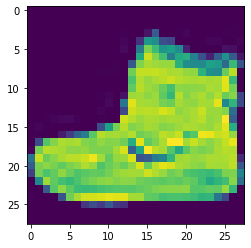

In [188]:
plt.imshow(x_train[0])

In [189]:
y_train[0]

9

## Preprocessing


1.   Feature scallling always need to be done
2.   Label Encoding(y=0,1,2,3,4,5,6,7,8,9)



In [190]:
x_train.max(),x_train.min()

(255, 0)

In [191]:
x_train=x_train/255
x_test=x_test/255

In [192]:
x_train.max(),x_train.min()

(1.0, 0.0)

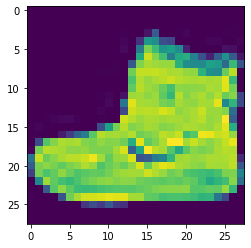

In [193]:
plt.imshow(x_train[0])

In [194]:
x_train.shape

(60000, 28, 28)

In [195]:
x_test.shape

(10000, 28, 28)

## Flattening

In [196]:
# Reshape
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

## Labels encoding

In [197]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [198]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

## Model


In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [200]:
model=Sequential()

In [201]:
# CNN(Feature extraction)
# feature extraction
model.add(Conv2D(filters=64,kernel_size=(2,2),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(2,2),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# flatten
model.add(Flatten())

In [202]:
## ANN
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [203]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [204]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 64)        16448     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 2304)              0         
                                                                 
 dense_9 (Dense)             (None, 256)              

In [205]:
x_train.shape

(60000, 28, 28, 1)

In [206]:
y_train.shape

(60000, 10)

In [207]:
# Training the model
model.fit(x_train,y_train,epochs=10,batch_size=100)

Epoch 1/10
600/600 [==============================] - 82s 136ms/step - loss: 0.4667 - accuracy: 0.8301
Epoch 2/10
600/600 [==============================] - 73s 122ms/step - loss: 0.3074 - accuracy: 0.8888
Epoch 3/10
600/600 [==============================] - 69s 115ms/step - loss: 0.2653 - accuracy: 0.9024
Epoch 4/10
600/600 [==============================] - 68s 114ms/step - loss: 0.2337 - accuracy: 0.9144
Epoch 5/10
600/600 [==============================] - 71s 118ms/step - loss: 0.2120 - accuracy: 0.9216
Epoch 6/10
600/600 [==============================] - 68s 113ms/step - loss: 0.1896 - accuracy: 0.9304
Epoch 7/10
600/600 [==============================] - 67s 112ms/step - loss: 0.1694 - accuracy: 0.9369
Epoch 8/10
600/600 [==============================] - 70s 117ms/step - loss: 0.1526 - accuracy: 0.9427
Epoch 9/10
600/600 [==============================] - 67s 112ms/step - loss: 0.1359 - accuracy: 0.9496
Epoch 10/10
600/600 [==============================] - 72s 119ms/step - l

In [208]:
# prediction 
y_pred=model.predict(x_test)

313/313 [==============================] - 4s 12ms/step


In [209]:
y_pred[0]

array([1.5860487e-06, 2.7077143e-09, 9.7726297e-07, 1.2565986e-09,
       8.2676488e-09, 1.8431265e-05, 2.2201212e-08, 1.7698884e-03,
       2.7449005e-08, 9.9820912e-01], dtype=float32)

In [210]:
y_pred=np.argmax(y_pred,axis=1)

In [211]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [212]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
 

In [213]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [217]:
print(confusion_matrix(y_pred,y_test))

[[835   2  18   7   1   0  76   0   5   1]
 [  0 982   0   5   0   0   1   0   1   0]
 [ 16   0 892   6  44   0  66   0   2   0]
 [ 18   8   6 943  36   0  25   0   6   0]
 [  4   1  54  14 887   0 100   0   0   0]
 [  3   0   0   0   1 994   0  20   5   7]
 [121   6  30  24  31   0 728   0   0   0]
 [  0   0   0   0   0   2   0 967   2  36]
 [  3   1   0   1   0   0   4   0 979   0]
 [  0   0   0   0   0   4   0  13   0 956]]


In [218]:
print(classification_report( y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       945
           1       0.98      0.99      0.99       989
           2       0.89      0.87      0.88      1026
           3       0.94      0.90      0.92      1042
           4       0.89      0.84      0.86      1060
           5       0.99      0.97      0.98      1030
           6       0.73      0.77      0.75       940
           7       0.97      0.96      0.96      1007
           8       0.98      0.99      0.98       988
           9       0.96      0.98      0.97       973

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



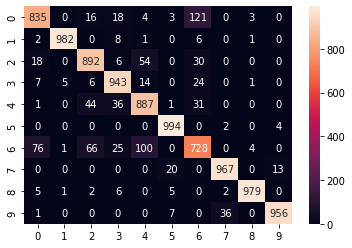

In [216]:
# heatmap of confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='1d');